# Random Forests Regressor Spring Break Assignment

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
from scipy import stats

from sklearn.externals import joblib

In [3]:
PATH = "./data/"

In [4]:
!ls {PATH}

data.csv  tmp


## The data

In [5]:
df_raw = pd.read_csv(f'{PATH}data.csv', low_memory=False)

In [6]:
df_raw.Release_Clause = np.log(df_raw.Release_Clause)

In [11]:
df_raw.columns.values

array(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Special', 'Preferred_Foot', 'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Work_Rate',
       'Body_Type', 'Real_Face', 'Position', 'Jersey_Number', 'Loaned_From', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina',
       'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes', 'Release_Claus

In [12]:
df_raw.columns.values.size

84

In [8]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [9]:
display_all(df_raw.tail().T)

,18202,18203,18204,18205,18206
Unnamed: 0,18202,18203,18204,18205,18206
ID,238813,243165,241638,246268,246269
Name,J. Lundstram,N. Christoffersson,B. Worman,D. Walker-Rice,G. Nugent
Age,19,19,16,17,16
Nationality,England,Sweden,England,England,England
Overall,47,47,47,47,46
Potential,65,63,67,66,66
Club,Crewe Alexandra,Trelleborgs FF,Cambridge United,Tranmere Rovers,Tranmere Rovers
Value,60000,60000,60000,60000,60000
Wage,1000,1000,1000,1000,1000


In [10]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207,NaN,NaN,NaN,9103,5256.05,0,4551.5,9103,13654.5,18206
ID,18207,NaN,NaN,NaN,214298,29965.2,16,200316,221759,236530,246620
Name,18207,17194,J. Rodríguez,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,18207,NaN,NaN,NaN,25.1222,4.66994,16,21,25,28,45
Nationality,18207,164,England,1662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall,18207,NaN,NaN,NaN,66.2387,6.90893,46,62,66,71,94
Potential,18207,NaN,NaN,NaN,71.3073,6.1365,48,67,71,75,95
Club,17966,651,Manchester City,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,18207,NaN,NaN,NaN,2.41778e+06,5.59235e+06,10000,325000,675000,2e+06,1.185e+08
Wage,18207,NaN,NaN,NaN,9768.93,21985.7,1000,1000,3000,9000,565000


### Initial processing

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [11]:
train_cats(df_raw)
#df_raw.describe()

We can specify the order to use for categorical variables if we wish:

In [12]:
df_raw.Name.cat.categories

Index(['A. Abang', 'A. Abdellaoui', 'A. Abdennour', 'A. Abdi', 'A. Abdu Jaber',
       'A. Abdulhameed', 'A. Abedzadeh', 'A. Abeid', 'A. Ablet', 'A. Abrashi',
       ...
       'Éverton Luiz', 'Ícaro', 'Íñigo López', 'Óliver Torres', 'Óscar',
       'Óscar Gil', 'Óscar Pinchi', 'Óscar Plano', 'Óscar Valentín',
       'Óscar Whalley'],
      dtype='object', length=17194)

In [13]:
#df_raw.UsageBand.cat.set_categories(['x', 'b', 'o'], ordered=True, inplace=True)

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [14]:
#df_raw.a1 = df_raw.a1.cat.codes

Do we have missing values? We can't pass these directly to a random forest.

In [15]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Acceleration                0.002636
Age                         0.000000
Aggression                  0.002636
Agility                     0.002636
Balance                     0.002636
BallControl                 0.002636
Body_Type                   0.002636
CAM                         0.114516
CB                          0.114516
CDM                         0.114516
CF                          0.114516
CM                          0.114516
Club                        0.013237
Composure                   0.002636
Crossing                    0.002636
Curve                       0.002636
Dribbling                   0.002636
FKAccuracy                  0.002636
Finishing                   0.002636
GKDiving                    0.002636
GKHandling                  0.002636
GKKicking                   0.002636
GKPositioning               0.002636
GKReflexes                  0.002636
HeadingAccuracy             0.002636
Height                      0.002636
ID                          0.000000
I

But let's save this file for now, since it's already in format can we be stored and accessed efficiently.

In [16]:
os.makedirs(f'{PATH}tmp', exist_ok=True)
df_raw.to_feather(f'{PATH}tmp/data-raw')

### Pre-processing

In the future we can simply read it from this fast format.

In [14]:
df_raw = pd.read_feather(f'{PATH}tmp/data-raw')

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [15]:
df, y, _ = proc_df(df_raw, 'Release_Clause')
df, y

(       Unnamed: 0      ID   Name  Age  Nationality  Overall  Potential  Club  \
 0               0  158023   9633   31            7       94         94   213   
 1               1   20801   3154   33          124       94         94   327   
 2               2  190871  12509   26           21       92         93   436   
 3               3  193080   4137   27          140       91         93   376   
 4               4  192985   8618   27           14       91         92   375   
 5               5  183277   4420   27           14       91         91   135   
 6               6  177003   9641   32           36       91         91   471   
 7               7  176580   9842   31          159       91         91   213   
 8               8  155862  15418   32          140       91         91   471   
 9               9  200389   7776   25          137       90         93    62   
 10             10  188545  13856   29          123       90         90   215   
 11             11  182521  

In [16]:
def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()

n_valid = 6400
n_valid = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_valid)

In [17]:
X_train, X_valid = split_vals(df, n_valid)
y_train, y_valid = split_vals(y, n_valid)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((11807, 122), (11807,), (6400, 122), (6400,))

# Random Forests

In [21]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9983624232927595

In [22]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
        rmse(m.predict(X_valid), y_valid),
        m.score(X_train, y_train), m.score(X_valid, y_valid)]
    print(res)

In [23]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 3.97 s, sys: 0 ns, total: 3.97 s
Wall time: 550 ms
[0.05771801067399967, 0.2832246083518588, 0.9978445716440073, 0.8459376832231932]


ValueError: x and y must be the same size

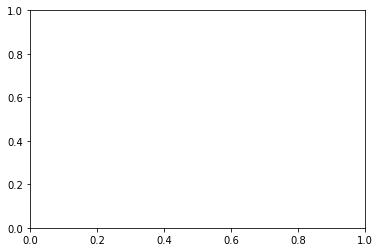

In [24]:
plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
#plt.plot(X_test, y_1, color="cornflowerblue",
#         label="max_depth=2", linewidth=2)
plt.plot(X_valid, y_valid, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [25]:
joblib.dump(m, 'model.pkl')

['model.pkl']